<a href="https://colab.research.google.com/github/fajni/DWKD-SPOZ/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K Means Algoritam

## Uvoz i ispis podataka

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plot
%matplotlib inline

In [3]:
!wget https://github.com/fajni/DWKD-SPOZ/raw/main/Data/MasinskoUcenje.csv -O MasinskoUcenje.csv

df = pd.read_csv("MasinskoUcenje.csv", encoding='ISO-8859-1').head(500) # Uzimanje prvih 500 redova, zbog performansi i bolje vizuelizacije
# df['Sales'] = df['UnitPrice'] * df['OrderQuantity'] * np.where(df['Discount'] == 0, 1, df['Discount'])
df['Sales'] = df['UnitPrice'] * df['OrderQuantity']
df['Expenses'] = df['Sales'] - df['Profit']
df

--2024-08-16 22:45:02--  https://github.com/fajni/DWKD-SPOZ/raw/main/Data/MasinskoUcenje.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fajni/DWKD-SPOZ/main/Data/MasinskoUcenje.csv [following]
--2024-08-16 22:45:02--  https://raw.githubusercontent.com/fajni/DWKD-SPOZ/main/Data/MasinskoUcenje.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1085687 (1.0M) [application/octet-stream]
Saving to: ‘MasinskoUcenje.csv’

MasinskoUcenje.csv  100%[===================>]   1.04M  --.-KB/s    in 0.01s   

2024-08-16 22:45:02 (82.1 MB/s) - ‘MasinskoUcenje.csv’ saved [1085687/1085687]



,Product_Name,Customer_Name,Region,OrderPriority,OrderPriorityPrice,Discount,UnitPrice,OrderQuantity,ShippingCost,ProductBaseMargin,Profit,Sales,Expenses
0,"Perma STOR-ALL Hanging File Box, 13 1/8""W x 1...",Joy Corbett,AsiaPac,3,10,0.10,6,32,5,0.68,106.36,192,85.64
1,Safco Industrial Wire Shelving,Anita Hahn,North America,0,0,0.08,96,2,35,0.50,45.64,192,146.36
2,"Avery Trapezoid Ring Binder, 3"" Capacity, Blac...",Ernest Oh,North America,4,15,0.06,41,3,3,0.36,33.90,123,89.10
3,Hon 4070 Series Pagoda Armless Upholstered St...,Scott Bunn,North America,1,5,0.00,292,4,49,0.56,605.08,1168,562.92
4,Hon Valutask Swivel Chairs,Scott Bunn,North America,1,5,0.07,101,43,45,0.69,2647.66,4343,1695.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,"ACCOHIDE® 3-Ring Binder, Blue, 1""",Vanessa Winstead,North America,4,15,0.05,4,1,5,0.08,-4.88,4,8.88
496,O'Sullivan Living Dimensions 3-Shelf Bookcases,Jeanne Werner,North America,0,0,0.02,201,45,56,0.75,6546.85,9045,2498.15
497,Xerox 1971,Jeanne Werner,North America,0,0,0.02,4,24,5,0.40,31.48,96,64.52
498,Accessory4,Jeanne Werner,North America,0,0,0.04,86,19,1,0.85,1322.54,1634,311.46


## Odnos između *Profit* (Profita) i *Sales* (Prodaja)

Kao glavne varijable za K - Means algoritam se koriste Profit i Sales varijable. Cilj je otkriti različite grupe ili klastere unutar ovih podataka.

Korišćenje Profita i Prodaje u K - Means algoritmu može pomoći u segmentaciji tržišta, analizi performansi proizvoda i donošenju informisanih poslovnih odluka na osnovu identifikovanih klastera.

Primer: Identifikovati grupe proizvoda sa sličnim karakteristikama. Algoritam će pokušati da pronađe klastere gde su proizvodi slični po ovim dimenzijama.



Razlog: Vizuelizacija kako se profit menja u zavisnosti od prodaje i za identifikovanje eventualnih obrazaca ili klastera u podacima

Text(0, 0.5, 'Profit')

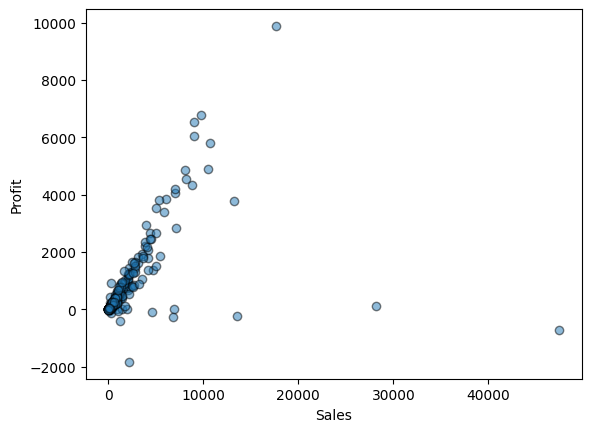

In [4]:
# Vizuelni grafikon odnosa između Profita (Profit) i Prodaja (Sales)

plot.scatter(df.Sales, df['Profit'], alpha=0.5, edgecolors='black') # isto je df.Profit ili df['Profit']
plot.xlabel('Sales')
plot.ylabel('Profit')

## Kreiranje i treniranje modela pre skaliranja i pre metode lakta

K - Means algoritam unapred zahteva broj klastera (parametar *n_clusters* ili K).

Prvi korak u kreiranju modela je definisanje nasumičnih tačaka koje predstavljaju centre klastera (centroidi/težišta). Ovi centroidi mogu biti postavljleni bilo gde na našem 2D prostoru.

> Kasnije o metodi lakta (*eng. Elbow Method*)



In [5]:
# Kreiranje instance K Means modela sa nasumičnim brojem centroida, K = 3. K predstavlja broj klastera, tj. težišta klastera

km = KMeans(n_clusters = 3)
km

KMeans(n_clusters=3)

Nakon definisanja broja klastera (K), potrebno je svaku tačku podataka (*red u tabeli*) dodeliti u najbliži klaster. Svaka tačka podataka treba pripadati najbližem klasteru koji može biti 0, 1 ili 2.

In [6]:
# Treniranje modela, tj. određivanje centara klastera (fit),
# Dodeljivanje svakog podatka u jedan od klastera na osnovu minimalne udaljenosti od centroida (predict)
# Rezultat je niz koji sadrži oznake klastera za svaki red u nasem skupu podataka
#   n_clusters = 3, vrednosti y_predicted su 0, 1, 2

y_predicted = km.fit_predict(df[['Sales', 'Profit']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [7]:
# Svakoj tački podataka (redu) dodeliti njen klaster (redni broj klastera) u tabeli

df['Cluster'] = y_predicted
df

,Product_Name,Customer_Name,Region,OrderPriority,OrderPriorityPrice,Discount,UnitPrice,OrderQuantity,ShippingCost,ProductBaseMargin,Profit,Sales,Expenses,Cluster
0,"Perma STOR-ALL Hanging File Box, 13 1/8""W x 1...",Joy Corbett,AsiaPac,3,10,0.10,6,32,5,0.68,106.36,192,85.64,2
1,Safco Industrial Wire Shelving,Anita Hahn,North America,0,0,0.08,96,2,35,0.50,45.64,192,146.36,2
2,"Avery Trapezoid Ring Binder, 3"" Capacity, Blac...",Ernest Oh,North America,4,15,0.06,41,3,3,0.36,33.90,123,89.10,2
3,Hon 4070 Series Pagoda Armless Upholstered St...,Scott Bunn,North America,1,5,0.00,292,4,49,0.56,605.08,1168,562.92,2
4,Hon Valutask Swivel Chairs,Scott Bunn,North America,1,5,0.07,101,43,45,0.69,2647.66,4343,1695.34,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,"ACCOHIDE® 3-Ring Binder, Blue, 1""",Vanessa Winstead,North America,4,15,0.05,4,1,5,0.08,-4.88,4,8.88,2
496,O'Sullivan Living Dimensions 3-Shelf Bookcases,Jeanne Werner,North America,0,0,0.02,201,45,56,0.75,6546.85,9045,2498.15,0
497,Xerox 1971,Jeanne Werner,North America,0,0,0.02,4,24,5,0.40,31.48,96,64.52,2
498,Accessory4,Jeanne Werner,North America,0,0,0.04,86,19,1,0.85,1322.54,1634,311.46,2


### Vizuelizacija rezultata K - Means klasterovanja

Za bolju vizuelizaciju rezultata klasterovanja kreiraju se novi data setovi, gde svaki set predstavlja poseban klaster.

Sledeći grafikon vizuelno prikazuje podatke iz 3 različita klastera dobijena primenom K - Means algoritma. Svaki klaster je predstavljen tačkama različite boje.

Rezultat: Vizuelni prikaz kako su podaci grupisani na osnovu sličnosti između 'Sales' i 'Profit'.

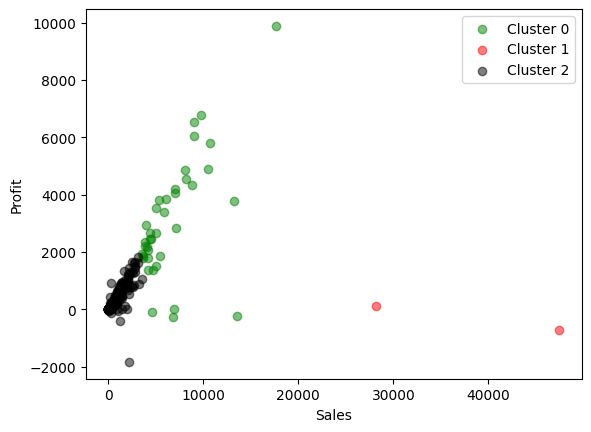

In [8]:
# Svaki cluster pripada svom data frame - u

df0 = df[df.Cluster == 0]
df1 = df[df.Cluster == 1]
df2 = df[df.Cluster == 2]
#df3 = df[df.Cluster == 3]
#df4 = df[df.Cluster == 4]
#df5 = df[df.Cluster == 5]
#df6 = df[df.Cluster == 6]
#df7 = df[df.Cluster == 7]
#df8 = df[df.Cluster == 8]

# X osa koristi vrednosti Sales, Y osa koristi vrednosti Profit

plot.scatter(df0.Sales, df0.Profit, color='green', label = 'Cluster 0', alpha=0.5)
plot.scatter(df1.Sales, df1.Profit, color='red', label = 'Cluster 1', alpha=0.5)
plot.scatter(df2.Sales, df2.Profit, color='black', label = 'Cluster 2', alpha=0.5)
#plot.scatter(df3.Sales, df3.Profit, color='blue', label = 'Cluster 3')
#plot.scatter(df4.Sales, df4.Profit, color='orange', label = 'Cluster 4')
#plot.scatter(df5.Sales, df5.Profit, color='brown', label = 'Cluster 5')
#plot.scatter(df5.Sales, df5.Profit, color='aqua', label = 'Cluster 6')
#plot.scatter(df5.Sales, df5.Profit, color='purple', label = 'Cluster 7')
#plot.scatter(df5.Sales, df5.Profit, color='pink', label = 'Cluster 8')

plot.xlabel('Sales')
plot.ylabel('Profit')

plot.legend()
plot.show()

## Skaliranje podataka

Za bolju tačnosti klasterovanja, izvršeno je skaliranje podataka.

Skaliranje podataka pre primene K - Means algoritma je ključno za dobijanje tačnijih i pouzdanijih rezultata, posebno kada se koriste različite karakteristike sa različitim opsezima vrednosti. Ovo pomaže u postizanju pravednog odnosa svake karakteristike prilikom klasterovanja i omogućava algoritmu da ispravno identifikuje slične grupe unutar podataka.

In [9]:
# Instanca MinMaxScaler klase koja ce se koristiti za skaliranje vrednosti u kolonama

scaler_profit = MinMaxScaler()
scaler_sales = MinMaxScaler()


# Profit i Sales u opsegu 0-1
# Računanje minimalne i maksimalne vrednosti u kolonama (fit)
# Transformacija podataka, zamenjuje originalne vrednosit skaliranim (transform)

scaler_profit.fit(df[['Profit']])
df['Profit'] = scaler_profit.transform(df[['Profit']])

scaler_sales.fit(df[['Sales']])
df['Sales'] = scaler_sales.transform(df[['Sales']])


df

,Product_Name,Customer_Name,Region,OrderPriority,OrderPriorityPrice,Discount,UnitPrice,OrderQuantity,ShippingCost,ProductBaseMargin,Profit,Sales,Expenses,Cluster
0,"Perma STOR-ALL Hanging File Box, 13 1/8""W x 1...",Joy Corbett,AsiaPac,3,10,0.10,6,32,5,0.68,0.165488,0.004002,85.64,2
1,Safco Industrial Wire Shelving,Anita Hahn,North America,0,0,0.08,96,2,35,0.50,0.160306,0.004002,146.36,2
2,"Avery Trapezoid Ring Binder, 3"" Capacity, Blac...",Ernest Oh,North America,4,15,0.06,41,3,3,0.36,0.159305,0.002548,89.10,2
3,Hon 4070 Series Pagoda Armless Upholstered St...,Scott Bunn,North America,1,5,0.00,292,4,49,0.56,0.208045,0.024558,562.92,2
4,Hon Valutask Swivel Chairs,Scott Bunn,North America,1,5,0.07,101,43,45,0.69,0.382345,0.091430,1695.34,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,"ACCOHIDE® 3-Ring Binder, Blue, 1""",Vanessa Winstead,North America,4,15,0.05,4,1,5,0.08,0.155995,0.000042,8.88,2
496,O'Sullivan Living Dimensions 3-Shelf Bookcases,Jeanne Werner,North America,0,0,0.02,201,45,56,0.75,0.715076,0.190463,2498.15,0
497,Xerox 1971,Jeanne Werner,North America,0,0,0.02,4,24,5,0.40,0.159098,0.001980,64.52,2
498,Accessory4,Jeanne Werner,North America,0,0,0.04,86,19,1,0.85,0.269268,0.034373,311.46,2


## Metoda lakta (Elbow method)

In [10]:
k_range = range(1, 10)
sse = []
for k in k_range:
  km = KMeans(n_clusters = k)
  km.fit(df[['Sales', 'Profit']])
  sse.append(km.inertia_)

sse

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

[5.915385498033427,
 2.6358800138839293,
 1.605447699324188,
 0.9050171537946474,
 0.6590624035134678,
 0.5157294268615332,
 0.42079979502899334,
 0.33252648461997936,
 0.24127063884996158]

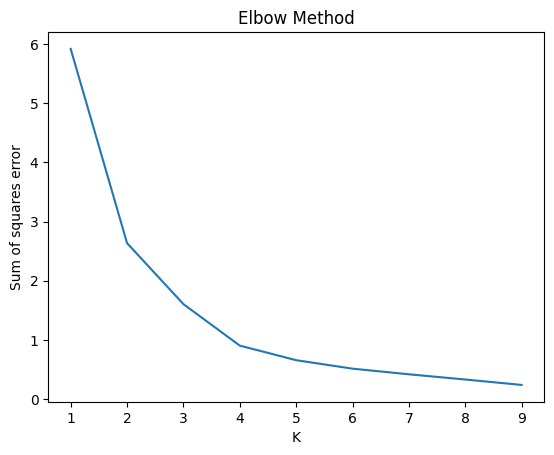

In [11]:
plot.title('Elbow Method')
plot.xlabel('K')
plot.ylabel('Sum of squares error')
plot.plot(k_range, sse)

## Kreiranje i treniranje modela posle skaliranja i posle metode lakta

In [12]:
# Ponovno kreiranje modela K - Means algoritma nakon skaliranja
# Ovde se kreira novi model sa prethodno određenim brojem klastera korišćenjem metode lakta

km = KMeans(n_clusters=4)

y_predicted = km.fit_predict(df[['Sales', 'Profit']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0,
       0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0,

In [13]:
df['Cluster'] = y_predicted
#df.drop('cluster', axis='columns', inplace=True)
df

,Product_Name,Customer_Name,Region,OrderPriority,OrderPriorityPrice,Discount,UnitPrice,OrderQuantity,ShippingCost,ProductBaseMargin,Profit,Sales,Expenses,Cluster
0,"Perma STOR-ALL Hanging File Box, 13 1/8""W x 1...",Joy Corbett,AsiaPac,3,10,0.10,6,32,5,0.68,0.165488,0.004002,85.64,0
1,Safco Industrial Wire Shelving,Anita Hahn,North America,0,0,0.08,96,2,35,0.50,0.160306,0.004002,146.36,0
2,"Avery Trapezoid Ring Binder, 3"" Capacity, Blac...",Ernest Oh,North America,4,15,0.06,41,3,3,0.36,0.159305,0.002548,89.10,0
3,Hon 4070 Series Pagoda Armless Upholstered St...,Scott Bunn,North America,1,5,0.00,292,4,49,0.56,0.208045,0.024558,562.92,0
4,Hon Valutask Swivel Chairs,Scott Bunn,North America,1,5,0.07,101,43,45,0.69,0.382345,0.091430,1695.34,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,"ACCOHIDE® 3-Ring Binder, Blue, 1""",Vanessa Winstead,North America,4,15,0.05,4,1,5,0.08,0.155995,0.000042,8.88,0
496,O'Sullivan Living Dimensions 3-Shelf Bookcases,Jeanne Werner,North America,0,0,0.02,201,45,56,0.75,0.715076,0.190463,2498.15,1
497,Xerox 1971,Jeanne Werner,North America,0,0,0.02,4,24,5,0.40,0.159098,0.001980,64.52,0
498,Accessory4,Jeanne Werner,North America,0,0,0.04,86,19,1,0.85,0.269268,0.034373,311.46,3


In [14]:
# Ispis svih centroida, i njihove pozicija na grafikonu (2D prostoru)
# centroidi (x, y)
# km.cluster_centers_

for i, centroid in enumerate(km.cluster_centers_):
    print(f"Centroid {i}: {centroid}")

Centroid 0: [0.00723834 0.16637779]
Centroid 1: [0.18583216 0.58492784]
Centroid 2: [0.79668906 0.12998656]
Centroid 3: [0.06613638 0.27874117]


### Konačna vizuelizacija K - Means klasterovanja

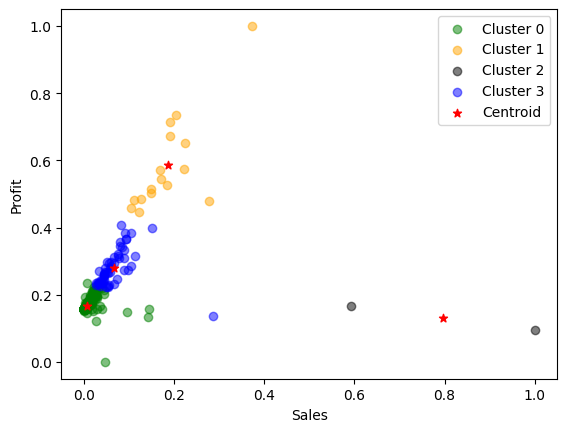

In [15]:
df0 = df[df.Cluster == 0]
df1 = df[df.Cluster == 1]
df2 = df[df.Cluster == 2]
df3 = df[df.Cluster == 3]

plot.scatter(df0.Sales, df0.Profit, color='green', label = 'Cluster 0', alpha=0.5)
plot.scatter(df1.Sales, df1.Profit, color='orange', label = 'Cluster 1', alpha=0.5)
plot.scatter(df2.Sales, df2.Profit, color='black', label = 'Cluster 2', alpha=0.5)
plot.scatter(df3.Sales, df3.Profit, color='blue', label = 'Cluster 3', alpha=0.5)

plot.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], color='red', marker='*', label='Centroid') # [:, 0] - : oznacava sve redove, 0 oznacava 0. kolonu

plot.xlabel('Sales')
plot.ylabel('Profit')
plot.legend()
plot.show()

## Pregled i analiza rezultata

In [16]:
# Vracanje skaliranih podataka u pocetni oblik

df['Sales'] = scaler_sales.inverse_transform(df[['Sales']])
df['Profit'] = scaler_profit.inverse_transform(df[['Profit']])

df0 = df[df.Cluster == 0]
df1 = df[df.Cluster == 1]
df2 = df[df.Cluster == 2]
df3 = df[df.Cluster == 3]

df

,Product_Name,Customer_Name,Region,OrderPriority,OrderPriorityPrice,Discount,UnitPrice,OrderQuantity,ShippingCost,ProductBaseMargin,Profit,Sales,Expenses,Cluster
0,"Perma STOR-ALL Hanging File Box, 13 1/8""W x 1...",Joy Corbett,AsiaPac,3,10,0.10,6,32,5,0.68,106.36,192.0,85.64,0
1,Safco Industrial Wire Shelving,Anita Hahn,North America,0,0,0.08,96,2,35,0.50,45.64,192.0,146.36,0
2,"Avery Trapezoid Ring Binder, 3"" Capacity, Blac...",Ernest Oh,North America,4,15,0.06,41,3,3,0.36,33.90,123.0,89.10,0
3,Hon 4070 Series Pagoda Armless Upholstered St...,Scott Bunn,North America,1,5,0.00,292,4,49,0.56,605.08,1168.0,562.92,0
4,Hon Valutask Swivel Chairs,Scott Bunn,North America,1,5,0.07,101,43,45,0.69,2647.66,4343.0,1695.34,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,"ACCOHIDE® 3-Ring Binder, Blue, 1""",Vanessa Winstead,North America,4,15,0.05,4,1,5,0.08,-4.88,4.0,8.88,0
496,O'Sullivan Living Dimensions 3-Shelf Bookcases,Jeanne Werner,North America,0,0,0.02,201,45,56,0.75,6546.85,9045.0,2498.15,1
497,Xerox 1971,Jeanne Werner,North America,0,0,0.02,4,24,5,0.40,31.48,96.0,64.52,0
498,Accessory4,Jeanne Werner,North America,0,0,0.04,86,19,1,0.85,1322.54,1634.0,311.46,3


In [17]:
# Prvi klaster

print("Cluster 0: ", df0.shape[0])
df0

Cluster 0:  426


,Product_Name,Customer_Name,Region,OrderPriority,OrderPriorityPrice,Discount,UnitPrice,OrderQuantity,ShippingCost,ProductBaseMargin,Profit,Sales,Expenses,Cluster
0,"Perma STOR-ALL Hanging File Box, 13 1/8""W x 1...",Joy Corbett,AsiaPac,3,10,0.10,6,32,5,0.68,106.36,192.0,85.64,0
1,Safco Industrial Wire Shelving,Anita Hahn,North America,0,0,0.08,96,2,35,0.50,45.64,192.0,146.36,0
2,"Avery Trapezoid Ring Binder, 3"" Capacity, Blac...",Ernest Oh,North America,4,15,0.06,41,3,3,0.36,33.90,123.0,89.10,0
3,Hon 4070 Series Pagoda Armless Upholstered St...,Scott Bunn,North America,1,5,0.00,292,4,49,0.56,605.08,1168.0,562.92,0
6,"Black Print Carbonless Snap-Off® Rapid Letter,...",Marjorie Bailey,AsiaPac,4,15,0.09,9,16,2,0.40,42.64,144.0,101.36,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,Xerox 210,Vickie Morse,North America,2,7,0.06,6,5,7,0.37,2.30,30.0,27.70,0
493,i2000,Kent Burton,North America,4,15,0.07,126,1,3,0.60,63.78,126.0,62.22,0
494,US Robotics 56K V.92 External Faxmodem,Jessica Huffman,North America,4,15,0.03,100,6,20,0.52,274.00,600.0,326.00,0
495,"ACCOHIDE® 3-Ring Binder, Blue, 1""",Vanessa Winstead,North America,4,15,0.05,4,1,5,0.08,-4.88,4.0,8.88,0


In [18]:
# Drugi klaster

print("Cluster 1: ", df1.shape[0])
df1

Cluster 1:  16


,Product_Name,Customer_Name,Region,OrderPriority,OrderPriorityPrice,Discount,UnitPrice,OrderQuantity,ShippingCost,ProductBaseMargin,Profit,Sales,Expenses,Cluster
62,"Riverside Palais Royal Lawyers Bookcase, Royal...",Derek Jernigan,North America,4,15,0.04,881,8,45,0.62,4042.84,7048.0,3005.16,1
173,Global Leather Executive Chair,Veronica Garrett,AsiaPac,2,7,0.05,351,25,39,0.55,4348.50,8775.0,4426.50,1
199,"Riverside Palais Royal Lawyers Bookcase, Royal...",Anna Ellis,North America,1,5,0.02,881,8,45,0.62,4183.80,7048.0,2864.20,1
224,Bretford Rectangular Conference Table Tops,Ellen Ennis Lehman,EMEA,2,7,0.06,376,24,86,0.74,6050.32,9024.0,2973.68,1
265,"Global High-Back Leather Tilter, Burgundy",Scott Bunn,North America,3,10,0.09,123,49,70,0.74,3847.55,6027.0,2179.45,1
314,Global Enterprise Series Seating High-Back Swi...,Joe Baldwin,North America,4,15,0.07,271,36,50,0.77,6779.20,9756.0,2976.80,1
334,Electrix Halogen Magnifier Lamp,Paul Tate,North America,4,15,0.03,194,42,12,0.59,4550.88,8148.0,3597.12,1
335,O'Sullivan Living Dimensions 2-Shelf Bookcases,Gail Lin,EMEA,4,15,0.02,121,44,59,0.75,3827.52,5324.0,1496.48,1
343,Chromcraft Rectangular Conference Tables,Neal Wolfe,North America,0,0,0.00,237,34,59,0.61,4856.38,8058.0,3201.62,1
356,Bretford Just In Time Height-Adjustable Mult...,Doris Fitzpatrick,North America,4,15,0.07,417,12,75,0.79,3527.88,5004.0,1476.12,1


In [19]:
# Treci klaster

print("Cluster 2: ", df2.shape[0])
df2

Cluster 2:  2


,Product_Name,Customer_Name,Region,OrderPriority,OrderPriorityPrice,Discount,UnitPrice,OrderQuantity,ShippingCost,ProductBaseMargin,Profit,Sales,Expenses,Cluster
13,Polycom ViaVideo Desktop Video Communications...,Mary Washington Hudson,AsiaPac,1,5,0.05,575,49,24,0.06,116.88,28175.0,28058.12,2
67,Polycom ViewStation ISDN Videoconferencing Unit,Bruce Kahn,EMEA,2,7,0.07,6783,7,24,0.06,-736.22,47481.0,48217.22,2


In [20]:
# Cetvrti klaster

print("Cluster 3: ", df3.shape[0])
df3

Cluster 3:  56


,Product_Name,Customer_Name,Region,OrderPriority,OrderPriorityPrice,Discount,UnitPrice,OrderQuantity,ShippingCost,ProductBaseMargin,Profit,Sales,Expenses,Cluster
4,Hon Valutask Swivel Chairs,Scott Bunn,North America,1,5,0.07,101,43,45,0.69,2647.66,4343.0,1695.34,3
5,"Dual Level, Single-Width Filing Carts",Scott Bunn,North America,1,5,0.05,155,32,7,0.59,2671.40,4960.0,2288.60,3
33,3285,Marshall Xu,EMEA,3,10,0.01,206,11,6,0.59,1308.28,2266.0,957.72,3
38,232,Rosemary Hedrick,AsiaPac,4,15,0.04,126,25,5,0.55,1601.50,3150.0,1548.50,3
44,Luxo Professional Fluorescent Magnifier Lamp w...,Betsy Puckett,North America,4,15,0.02,210,10,21,0.59,1176.00,2100.0,924.00,3
74,Polycom ViewStation ISDN Videoconferencing Unit,Don Rogers,North America,2,7,0.07,6783,2,24,0.06,-227.49,13566.0,13793.49,3
81,GBC DocuBind TL300 Electric Binding System,Eugene Clayton,North America,3,10,0.03,897,6,20,0.38,1863.70,5382.0,3518.30,3
97,Panasonic KX-P3200 Dot Matrix Printer,Sylvia Kumar,North America,1,5,0.03,298,12,15,0.57,1916.04,3576.0,1659.96,3
103,Okidata ML320 Series Turbo Dot Matrix Printers,Vicki Hauser,North America,1,5,0.08,400,5,12,0.56,948.00,2000.0,1052.00,3
109,Global Leather Executive Chair,Tammy Meyers,AsiaPac,1,5,0.05,351,12,39,0.55,2067.00,4212.0,2145.00,3


In [21]:
print('\nCluster 0:')
print(df0[['Profit', 'Sales']].describe())

print('\nCluster 1:')
print(df1[['Profit', 'Sales']].describe())

print('\nCluster 2:')
print(df2[['Profit', 'Sales']].describe())

print('\nCluster 3:')
print(df3[['Profit', 'Sales']].describe())


Cluster 0:
            Profit        Sales
count   426.000000   426.000000
mean    116.789695   345.669014
std     200.654592   630.784614
min   -1832.950000     2.000000
25%      11.240000    44.250000
50%      45.340000   144.000000
75%     171.130000   384.000000
max     932.360000  6900.000000

Cluster 1:
            Profit         Sales
count    16.000000     16.000000
mean   5021.673125   8825.125000
std    1680.751537   3224.200694
min    3383.680000   5004.000000
25%    3842.542500   6792.750000
50%    4449.690000   8461.500000
75%    5873.830000   9942.000000
max    9885.800000  17680.000000

Cluster 2:
           Profit         Sales
count    2.000000      2.000000
mean  -309.670000  37828.000000
std    603.232795  13651.403518
min   -736.220000  28175.000000
25%   -522.945000  33001.500000
50%   -309.670000  37828.000000
75%    -96.395000  42654.500000
max    116.880000  47481.000000

Cluster 3:
            Profit         Sales
count    56.000000     56.000000
mean   1433.5

### Dominantni regioni i proizvodi

Kao jedna od analiza, potrebno je utvrditi koji regioni dominiraju i koji se proizvodi najvise kupuju u pojedinim klasterima.

Pre analize klastera, utvrditi nad celim skupom podataka.

In [22]:
df_region = df['Region'].value_counts().idxmax()
df_product = df['Product_Name'].value_counts().idxmax()
print(f"Region koji se najviše pojavljuje u df: {df_region}")
print(f"Proizvod koji se najviše pojavljuje u df: {df_product}")

Region koji se najviše pojavljuje u df: North America
Proizvod koji se najviše pojavljuje u df: Avery Printable Repositionable Plastic Tabs


In [23]:
df0_region = df0['Region'].value_counts().idxmax()
df0_product = df0['Product_Name'].value_counts().idxmax()
print(f"Region koji se najviše pojavljuje u df0: {df0_region}")
print(f"Proizvod koji se najviše pojavljuje u df0: {df0_product}")


Region koji se najviše pojavljuje u df0: North America
Proizvod koji se najviše pojavljuje u df0: Avery Printable Repositionable Plastic Tabs


In [24]:
df1_region = df1['Region'].value_counts().idxmax()
df1_product = df1['Product_Name'].value_counts().idxmax()
print(f"Region koji se najviše pojavljuje u df1: {df1_region}")
print(f"Proizvod koji se najviše pojavljuje u df1: {df1_product}")

Region koji se najviše pojavljuje u df1: North America
Proizvod koji se najviše pojavljuje u df1: Riverside Palais Royal Lawyers Bookcase, Royale Cherry Finish


In [25]:
df2_region = df2['Region'].value_counts().idxmax()
df2_product = df2['Product_Name'].value_counts().idxmax()
print(f"Region koji se najviše pojavljuje u df2: {df2_region}")
print(f"Proizvod koji se najviše pojavljuje u df2: {df2_product}")

Region koji se najviše pojavljuje u df2: AsiaPac
Proizvod koji se najviše pojavljuje u df2: Polycom ViaVideo Desktop Video Communications Unit


In [26]:
df3_region = df3['Region'].value_counts().idxmax()
df3_product = df3['Product_Name'].value_counts().idxmax()
print(f"Region koji se najviše pojavljuje u df3: {df3_region}")
print(f"Proizvod koji se najviše pojavljuje u df3: {df3_product}")

Region koji se najviše pojavljuje u df3: North America
Proizvod koji se najviše pojavljuje u df3: Sanyo 2.5 Cubic Foot Mid-Size Office Refrigerators


### Analiza profita i prodaja

In [27]:
df0_najveci_profit = df0['Profit'].max()
df0_najmanji_profit = df0['Profit'].min()
df0_srednja_profit = df0['Profit'].mean()

print(f"Najveći profit za df0: {df0_najveci_profit}")
print(f"Najmanji profit za df0: {df0_najmanji_profit}")
print(f"Srednja vrednost profita za df0: {df0_srednja_profit}")

df0_najveca_prodaja = df0['Sales'].max()
df0_najmanja_prodaja = df0['Sales'].min()
df0_srednja_prodaje = df0['Sales'].mean()

print(f"Najveća prodaja za df0: {df0_najveca_prodaja}")
print(f"Najmanja prodaja za df0: {df0_najmanja_prodaja}")
print(f"Srednja vrednost prodaje za df0: {df0_srednja_prodaje}")

Najveći profit za df0: 932.3600000000001
Najmanji profit za df0: -1832.9500000000003
Srednja vrednost profita za df0: 116.78969483568075
Najveća prodaja za df0: 6900.0
Najmanja prodaja za df0: 2.0
Srednja vrednost prodaje za df0: 345.66901408450707


In [28]:
df1_najveci_profit = df1['Profit'].max()
df1_najmanji_profit = df1['Profit'].min()
df1_srednja_profit = df1['Profit'].mean()

print(f"Najveći profit za df1: {df1_najveci_profit}")
print(f"Najmanji profit za df1: {df1_najmanji_profit}")
print(f"Srednja vrednost profita za df1: {df1_srednja_profit}")

df1_najveca_prodaja = df1['Sales'].max()
df1_najmanja_prodaja = df1['Sales'].min()
df1_srednja_prodaje = df1['Sales'].mean()

print(f"Najveća prodaja za df1: {df1_najveca_prodaja}")
print(f"Najmanja prodaja za df1: {df1_najmanja_prodaja}")
print(f"Srednja vrednost prodaje za df1: {df1_srednja_prodaje}")

Najveći profit za df1: 9885.8
Najmanji profit za df1: 3383.68
Srednja vrednost profita za df1: 5021.673125
Najveća prodaja za df1: 17680.0
Najmanja prodaja za df1: 5004.0
Srednja vrednost prodaje za df1: 8825.125


In [29]:
df2_najveci_profit = df2['Profit'].max()
df2_najmanji_profit = df2['Profit'].min()
df2_srednja_profit = df2['Profit'].mean()

print(f"Najveći profit za df2: {df2_najveci_profit}")
print(f"Najmanji profit za df2: {df2_najmanji_profit}")
print(f"Srednja vrednost profita za df2: {df2_srednja_profit}")

df2_najveca_prodaja = df2['Sales'].max()
df2_najmanja_prodaja = df2['Sales'].min()
df2_srednja_prodaje = df2['Sales'].mean()

print(f"Najveća prodaja za df2: {df2_najveca_prodaja}")
print(f"Najmanja prodaja za df2: {df2_najmanja_prodaja}")
print(f"Srednja vrednost prodaje za df2: {df2_srednja_prodaje}")

Najveći profit za df2: 116.87999999999997
Najmanji profit za df2: -736.22
Srednja vrednost profita za df2: -309.67
Najveća prodaja za df2: 47481.0
Najmanja prodaja za df2: 28175.000000000004
Srednja vrednost prodaje za df2: 37828.0


In [30]:
df3_najveci_profit = df3['Profit'].max()
df3_najmanji_profit = df3['Profit'].min()
df3_srednja_profit = df3['Profit'].mean()

print(f"Najveći profit za df3: {df3_najveci_profit}")
print(f"Najmanji profit za df3: {df3_najmanji_profit}")
print(f"Srednja vrednost profita za df3: {df3_srednja_profit}")

df3_najveca_prodaja = df3['Sales'].max()
df3_najmanja_prodaja = df3['Sales'].min()
df3_srednja_prodaje = df3['Sales'].mean()

print(f"Najveća prodaja za df3: {df3_najveca_prodaja}")
print(f"Najmanja prodaja za df3: {df3_najmanja_prodaja}")
print(f"Srednja vrednost prodaje za df3: {df3_srednja_prodaje}")

Najveći profit za df3: 2932.84
Najmanji profit za df3: -227.4900000000001
Srednja vrednost profita za df3: 1433.5480357142858
Najveća prodaja za df3: 13566.0
Najmanja prodaja za df3: 1248.0
Srednja vrednost prodaje za df3: 3142.089285714286
